In [204]:
from imutils import paths
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import timeit

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses

import tensorflow_addons as tfa

from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.xception import decode_predictions

In [205]:
print("[INFO]: Trying to Read the images")
#  Configure the Image Location
# 이미지 위치 구성하기
imagePaths = list(paths.list_images(r'C:\Users\cvpr\Documents\Bishal\Allergic Rhinitis\Dataset\non_rotate'))

[INFO]: Trying to Read the images


In [206]:
imagePaths

['C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n13_1_00002_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n13_1_00003_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n13_2_00001_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n14_1_00001_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n14_1_00007_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n15_2_00005_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n1_1_00001_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n6_1_00004_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset

In [207]:
shuffle(imagePaths)
imagePaths

['C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset4\\0\\n35_2_00002_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset2\\0\\n20_2_00001_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset4\\2\\27_1_00005_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset1\\2\\18_2_00003_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\2\\4_1_00002_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset1\\0\\n17_5_00003_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset3\\1\\33_1_00005_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset1\\1\\13_2_00004_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset4\\0\

In [208]:
imagePaths = list(paths.list_images("Dataset/non_rotate"))
len(imagePaths)
imagePaths[0].split(os.path.sep)[-3]

'dataset0'

In [209]:
trainCount = 0
testCount =0
for imagepath in imagePaths:
    if imagepath.split(os.path.sep)[-3] == "dataset4":
        testCount+=1
    else:
        trainCount+=1
totalCount = trainCount+testCount
print("trainCount-",trainCount)
print("testCount-", testCount)
print("totalCount", totalCount)

trainCount- 73
testCount- 17
totalCount 90


In [210]:
len(imagePaths)

90

In [211]:
from datetime import datetime
datetime.now().strftime('%H:%M:%S')

'19:54:38'

In [267]:
# Initialize data and labels
# 데이터 및 레이블 초기화/
data = []
labels = []
dirList= []

In [268]:
# Formatting data and labels
for imagePath in imagePaths:
    # Extract the class label from file name and append to labels
    # 파일 이름에서 클래스 레이블을 추출하고 레이블에 추가함
    label = imagePath.split(os.path.sep)[-2]
    #if label=="2":
     #   labels.append("1")
    #else:
     #   labels.append(label)
    labels.append(label)
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring the aspect ratio
    # 이미지를 로드하고, 컬러 채널을 스왑하고, 가로 세로 비율을 무시하고 고정 224x224 픽셀로 크기를 조정함
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    # Append to data
    # 데이터에 추가
    data.append(image)

# Convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0,1]
# 픽셀 강도를 [0,1] 범위로 조정하면서 데이터와 레이블을 NumPy 배열로 변환
data = np.array(data) / 255.0
labels = np.array(labels)

In [269]:
labels.shape

(90,)

In [270]:
labels

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '2',
       '2', '2', '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '2', '2', '2',
       '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '2', '2', '2', '2', '2', '2', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '2', '2', '2', '2', '2', '2'],
      dtype='<U1')

In [271]:
data[0].shape

(224, 224, 3)

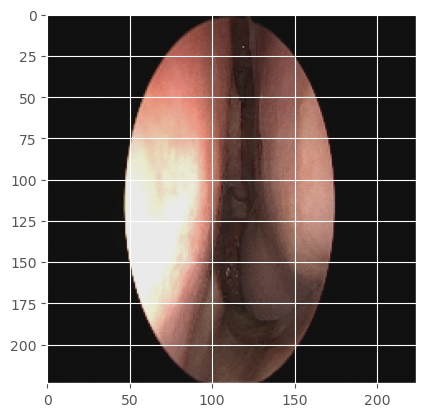

In [272]:
plt.imshow(data[1])

In [273]:
# Perform the one-hot encoding on the labels
# 레이블에 대해 원핫 인코딩 수행
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels, 3); 
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [274]:
# Initialize the training data augmentation
# 교육 데이터 억멘테이션 초기화
trainAug = ImageDataGenerator(rotation_range=40, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2,
		shear_range=0.15,fill_mode="nearest", horizontal_flip=True)

In [263]:
labels.shape

(90, 3, 3)

In [264]:
# Partition the data into training and testing splits using 80% of the training data and the remaining 20% for testing
# 교육 데이터의 80%, 테스트에 20%를 사용하여 데이터를 교육 및 테스트 분할로 분할
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

ValueError: Found array with dim 3. None expected <= 2.

In [265]:
# Load the network, ensuring the Head-FC layer sets are left off
# Head-FC 레이어 세트가 포함되지 않도록 네트워크를 로드한다
baseModel = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(224,224,3)))

In [185]:
# Construct the head model that will be placed on the top of the base model
# 보디 모델의 맨 위에 배치할 헤드 모델 구성
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

In [186]:
# Place the Head-FC model on top of the Base model - This become the actual model that we will train
# Head-FC 모델을 보디 모델 위에 배치한다. 이것이 우리가 교육할 실제 모델이 될 것이다.
model = Model(inputs=baseModel.input, outputs=headModel)

In [187]:
# Make sure that the basemodel layers will not be trained and only head model will be trained.
# 보디 모델 레이어가 훈련되지 않고 헤드 모델만 훈련되는지 확인한다.
for layer in baseModel.layers:
    layer.trainable = False

In [188]:
trainX.shape

(72, 224, 224, 3)

In [189]:
testX.shape

(18, 224, 224, 3)

In [190]:
# Set the hyper-parameters
# 하이퍼 파라미터 설정
# INIT_LR = 1e-3
INIT_LR = 0.001
EPOCHS = 100
BS = 8

In [191]:
# Compile the Model
# 모델 컴파일
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss=losses.CategoricalCrossentropy(), optimizer=opt, metrics=["accuracy"])

In [192]:
# Train the Network Model
# 모델 교육
print("[INFO] Model Training")
start = timeit.default_timer()
H = model.fit(
        trainAug.flow(trainX, trainY, batch_size=BS),
        steps_per_epoch=len(trainX) // BS,
        validation_data=(testX, testY),
        validation_steps=len(testX) // BS,
        epochs=EPOCHS)

[INFO] Model Training
Epoch 1/100
9/9 [==============================] - 5s 188ms/step - loss: 1.1711 - accuracy: 0.5000 - val_loss: 0.8994 - val_accuracy: 0.6667
Epoch 2/100
9/9 [==============================] - 1s 104ms/step - loss: 1.0785 - accuracy: 0.5000 - val_loss: 0.8649 - val_accuracy: 0.5556
Epoch 3/100
9/9 [==============================] - 1s 96ms/step - loss: 0.9709 - accuracy: 0.5139 - val_loss: 0.8393 - val_accuracy: 0.7778
Epoch 4/100
9/9 [==============================] - 1s 95ms/step - loss: 0.9242 - accuracy: 0.5833 - val_loss: 0.8399 - val_accuracy: 0.7222
Epoch 5/100
9/9 [==============================] - 1s 97ms/step - loss: 0.9314 - accuracy: 0.5694 - val_loss: 0.8389 - val_accuracy: 0.7778
Epoch 6/100
9/9 [==============================] - 1s 100ms/step - loss: 0.8441 - accuracy: 0.6111 - val_loss: 0.8343 - val_accuracy: 0.8333
Epoch 7/100
9/9 [==============================] - 1s 98ms/step - loss: 0.8263 - accuracy: 0.6111 - val_loss: 0.8483 - val_accuracy: 0.

Epoch 59/100
9/9 [==============================] - 1s 102ms/step - loss: 0.4471 - accuracy: 0.8056 - val_loss: 0.8609 - val_accuracy: 0.7222
Epoch 60/100
9/9 [==============================] - 1s 101ms/step - loss: 0.5975 - accuracy: 0.7917 - val_loss: 0.9392 - val_accuracy: 0.6111
Epoch 61/100
9/9 [==============================] - 1s 100ms/step - loss: 0.5431 - accuracy: 0.7639 - val_loss: 0.8324 - val_accuracy: 0.7222
Epoch 62/100
9/9 [==============================] - 1s 100ms/step - loss: 0.6089 - accuracy: 0.7083 - val_loss: 0.9562 - val_accuracy: 0.7222
Epoch 63/100
9/9 [==============================] - 1s 95ms/step - loss: 0.6418 - accuracy: 0.7778 - val_loss: 0.8906 - val_accuracy: 0.6667
Epoch 64/100
9/9 [==============================] - 1s 97ms/step - loss: 0.6018 - accuracy: 0.7639 - val_loss: 0.9429 - val_accuracy: 0.6667
Epoch 65/100
9/9 [==============================] - 1s 94ms/step - loss: 0.5111 - accuracy: 0.7639 - val_loss: 0.9556 - val_accuracy: 0.8333
Epoch 66/

In [193]:
stop = timeit.default_timer()
print('Total Training Time: ', stop - start) 

Total Training Time:  181.55653719999964


In [194]:
testX.shape

(18, 224, 224, 3)

In [195]:
testX[:1].shape

(1, 224, 224, 3)

In [196]:
# Make predictions on the testing set
# 테스트 세트에서 예측한다
print("Making Predictions on the Test Set")
predIdxs = model.predict(testX, batch_size=BS)
preds = predIdxs
predIdxs = np.argmax(predIdxs, axis=1)
print("Classification Report")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

Making Predictions on the Test Set
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.50      0.33      0.40         3
           2       0.83      0.83      0.83         6

    accuracy                           0.78        18
   macro avg       0.71      0.69      0.69        18
weighted avg       0.76      0.78      0.77        18



In [197]:
preds

array([[6.1206329e-01, 4.1543464e-03, 3.8378239e-01],
       [4.6812586e-02, 7.7766995e-03, 9.4541079e-01],
       [8.3691165e-02, 3.6800738e-02, 8.7950808e-01],
       [1.7980838e-01, 4.1359472e-03, 8.1605566e-01],
       [2.9485586e-01, 3.8066229e-01, 3.2448182e-01],
       [9.5275581e-01, 1.7181238e-02, 3.0062985e-02],
       [1.0007701e-01, 3.0041102e-02, 8.6988181e-01],
       [9.8445082e-01, 2.8694172e-03, 1.2679717e-02],
       [9.7774124e-01, 2.2688306e-04, 2.2031836e-02],
       [9.7023726e-01, 4.7948393e-05, 2.9714741e-02],
       [6.0402608e-01, 2.5535458e-01, 1.4061931e-01],
       [7.8760654e-01, 4.4945767e-03, 2.0789883e-01],
       [9.8648757e-01, 1.0337132e-03, 1.2478687e-02],
       [4.4654679e-01, 5.1431498e-04, 5.5293888e-01],
       [7.4311369e-03, 2.5748587e-01, 7.3508304e-01],
       [9.9003577e-01, 1.7599927e-04, 9.7881751e-03],
       [7.9341924e-01, 1.0118926e-02, 1.9646186e-01],
       [4.0756087e-03, 5.0438792e-01, 4.9153641e-01]], dtype=float32)

In [198]:
len(predIdxs)

18

In [200]:
# Compute Confusion Matrix and derrive raw, accuracy, sensitivity, specificity from it
# 혼란 매트릭스
cm= confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0,0] + cm[1,1] +cm[2,2]) / total

sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
# 혼란 매트릭스 보기
print("Confusion Matrix and its Derrivatives")
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Confusion Matrix and its Derrivatives
[[8 0 1]
 [2 1 0]
 [0 1 5]]
acc: 0.7778
sensitivity: 1.0000
specificity: 0.3333


In [201]:
H.history["accuracy"]

[0.5,
 0.5,
 0.5138888955116272,
 0.5833333134651184,
 0.5694444179534912,
 0.6111111044883728,
 0.6111111044883728,
 0.6111111044883728,
 0.6388888955116272,
 0.6666666865348816,
 0.7083333134651184,
 0.5972222089767456,
 0.7083333134651184,
 0.7222222089767456,
 0.625,
 0.6666666865348816,
 0.7222222089767456,
 0.6666666865348816,
 0.6666666865348816,
 0.6805555820465088,
 0.7361111044883728,
 0.7083333134651184,
 0.75,
 0.8194444179534912,
 0.7083333134651184,
 0.6388888955116272,
 0.7777777910232544,
 0.7361111044883728,
 0.7361111044883728,
 0.6944444179534912,
 0.7361111044883728,
 0.75,
 0.7638888955116272,
 0.75,
 0.6944444179534912,
 0.7916666865348816,
 0.7222222089767456,
 0.7638888955116272,
 0.7361111044883728,
 0.7777777910232544,
 0.7361111044883728,
 0.7361111044883728,
 0.7361111044883728,
 0.6805555820465088,
 0.75,
 0.75,
 0.7638888955116272,
 0.7361111044883728,
 0.8472222089767456,
 0.7638888955116272,
 0.7083333134651184,
 0.8055555820465088,
 0.8472222089767456,


Final Plot Generated.


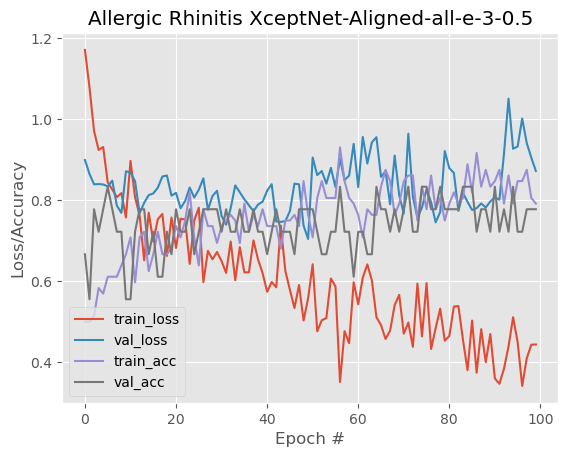

In [202]:
# plot the training loss and accuracy
# 플롯 그래프
print("Final Plot Generated.")
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Allergic Rhinitis XceptNet-Aligned-all-e-3-0.5")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig("[iter-3] [XCEPTN] plot,rotate-1e3")

model.output_shape # model summary representation
model.summary() # model configuration
model.get_config() # list all weight tensors in the model

In [ ]:
model.output_shape

In [ ]:
model.summary()

model.summary()

In [ ]:
model.summary()

In [ ]:
preds

In [ ]:
model.save("ARhinitisModel", save_format="h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

print("[INFO] saving Allergic Rhinitis detector model...")
model.save("ARhinitisModel", save_format="h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

decoded = imagenet_utils.decode_predictions(preds)

gradCAM


In [36]:
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras

In [37]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [38]:
testX[0].shape

(224, 224, 3)

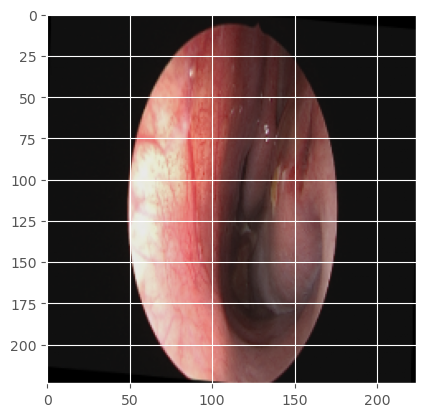

In [39]:
plt.imshow(testX[0])
plt.show()

preprocess_input = keras.applications.xception.preprocess_input

for i in testX:
    image = np.expand_dims(i, axis=0)
    image = imagenet_utils.preprocess_input(i)

In [42]:
testImage = testX[12]
testImage = np.expand_dims(testImage, axis = 0)

In [43]:
testImage = np.uint8(255 * testImage)


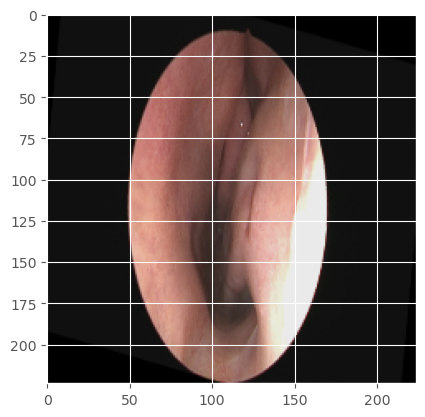

In [44]:
plt.imshow(testImage[0])
plt.show()

To save img

In [45]:
img101 = keras.preprocessing.image.array_to_img(testImage[0])

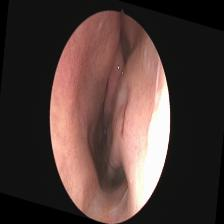

In [46]:
img101.save("temp.jpg")
display(Image("temp.jpg"))

Select Last Layer

In [47]:
last_conv_layer_name = "block14_sepconv2_act"

Get Heatmap

[[7.5773758e-01 4.0521350e-02 2.0174100e-01]
 [9.0666309e-02 3.3217065e-02 8.7611663e-01]
 [7.6192573e-02 1.4452259e-01 7.7928478e-01]
 [3.3923325e-01 6.5505415e-02 5.9526134e-01]
 [9.5285147e-02 8.5699815e-01 4.7716666e-02]
 [9.9570090e-01 1.5510028e-03 2.7480661e-03]
 [6.4452279e-01 1.1024495e-01 2.4523222e-01]
 [8.5153824e-01 1.2440102e-01 2.4060681e-02]
 [9.9375063e-01 3.5841626e-04 5.8908891e-03]
 [9.9985802e-01 7.0320511e-06 1.3496158e-04]
 [7.5881130e-01 2.3926780e-01 1.9209004e-03]
 [9.9635714e-01 8.9222245e-04 2.7506510e-03]
 [9.9995399e-01 8.2268352e-06 3.7751954e-05]
 [6.3500404e-01 5.2946275e-03 3.5970131e-01]
 [1.3827731e-02 6.2396157e-01 3.6221063e-01]
 [9.0006900e-01 1.1264326e-02 8.8666715e-02]
 [4.3508253e-01 2.1344087e-01 3.5147658e-01]
 [9.7628844e-01 1.7384226e-03 2.1973185e-02]]
(7, 7)


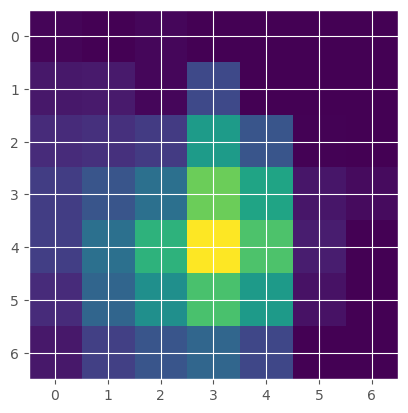

In [48]:
# Prepare image
#img_array = testX[:1]

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
#preds = model.predict(testImage)
#print("Predicted:", decode_predictions(preds, top=1)[0])
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(testImage, model, last_conv_layer_name)
print(heatmap.shape)

# Display heatmap
plt.imshow(heatmap)
plt.show()

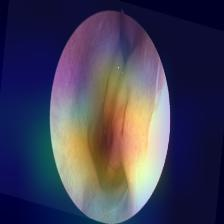

In [49]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4, img_=None):
    # Load the original image
    #img = keras.preprocessing.image.load_img(img_path)
    #img = keras.preprocessing.image.img_to_array(img)
    img = img_
   

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam("temp.jpg", heatmap, img_=testImage[0])

In [57]:
testX[0].shape

(224, 224, 3)

In [50]:
import gradCam2

In [51]:
img_ = imagePaths[24]

In [52]:
heat = gradCam2.getHeatMap(img_, model, "block14_sepconv2_act",imageType="path")

In [53]:
gradCam2.saveGradCam(img_, heat)